<a href="https://colab.research.google.com/github/bimal-bp/Fake-News-Detection.ipynb./blob/ML_MODELS/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd

In [28]:
true=pd.read_csv('/content/drive/MyDrive/True.csv')

In [29]:
fake= pd.read_csv('/content/drive/MyDrive/Fake.csv')

In [30]:
true.head(3)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


In [31]:
fake.head(3)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"


In [32]:
## import libraies
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import tensorflow as tf
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten, Bidirectional, MaxPooling1D

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [33]:
# Adding A Target Class Column To Indicate Whether The News Is Real Or Fake
true['isfake']=1
fake['isfake']=0

In [34]:
# concat true and fake
df=pd.concat([true,fake]).reset_index(drop=True)
df.head()

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [35]:
df.shape

(44898, 5)

In [36]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
isfake     0
dtype: int64

In [37]:
df.duplicated().sum()

209

In [38]:
df.columns

Index(['title', 'text', 'subject', 'date', 'isfake'], dtype='object')

In [39]:
df.drop(columns=['date'],inplace=True)

In [40]:
# combine title and text together
df['original']=df['title']+' '+df['text']
df.head(2)

,title,text,subject,isfake,original
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...


In [42]:
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [41]:
# Data Cleaning

from nltk.corpus import stopwords
stop_words=stopwords.words('english')
stop_words.extend(['from','subject','re','edu','use'])

In [45]:
# removing sto[ words
def preprocess(text):
  result=[]
  for token in gensim.utils.simple_preprocess(text):
    if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3 and token not in stop_words:
      result.append(token)
  return result

In [46]:
df['clean']=df['original'].apply(preprocess)
df.head(3)

,title,text,subject,isfake,original,clean
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, mueller, washing..."


In [ ]:
df['clean'][0]

In [48]:
#  obtaining total words in the data

list_of_words=[]
for i in df.clean:
  for j in i:
    list_of_words.append(j)

In [50]:
len(list_of_words)

9276947

In [52]:
total_words=len(list(set(list_of_words)))
total_words

108704

In [53]:
# joinng the words
df['clean_joined']=df['clean'].apply(lambda x:" ".join(x))
df.head(3)

,title,text,subject,isfake,original,clean,clean_joined
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc...",budget fight looms republicans flip fiscal scr...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond...",military accept transgender recruits monday pe...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, mueller, washing...",senior republican senator mueller washington r...


In [54]:
df['clean_joined'][0]

'budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying need government raise 

<Axes: xlabel='count', ylabel='subject'>

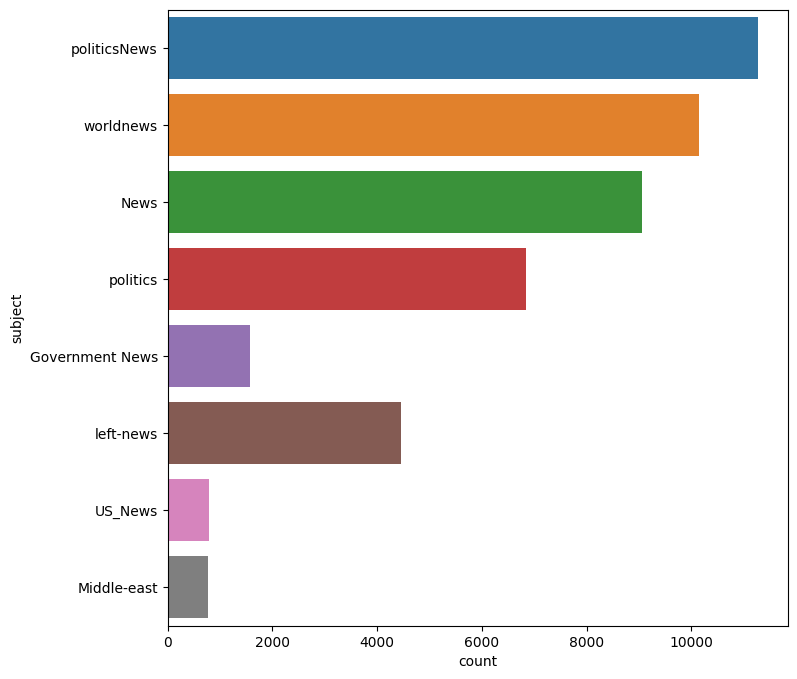

In [55]:
# numner of samples
plt.figure(figsize=(8,8))
sns.countplot(y='subject',data=df)

In [56]:
df['isfake'].value_counts()

0    23481
1    21417
Name: isfake, dtype: int64

<Axes: xlabel='count', ylabel='isfake'>

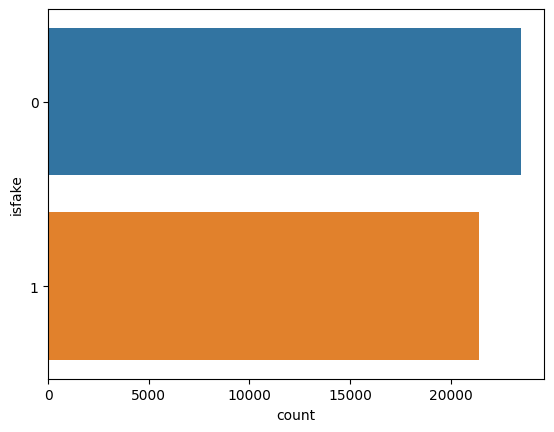

In [57]:
sns.countplot(y='isfake',data =df)

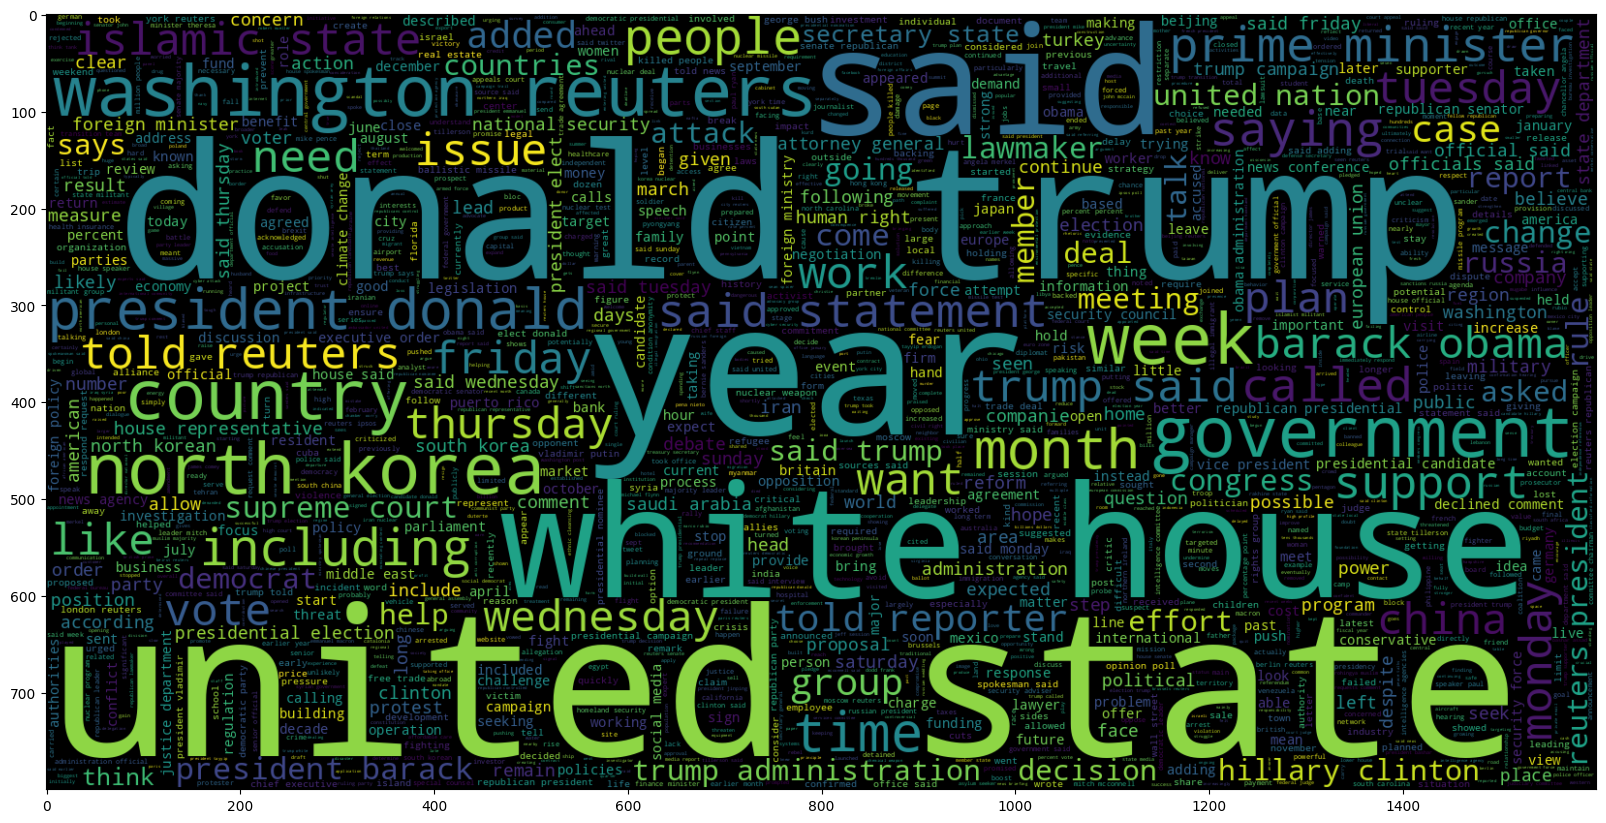

In [58]:
# word cloud
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 1].clean_joined))
plt.imshow(wc,interpolation='bilinear')

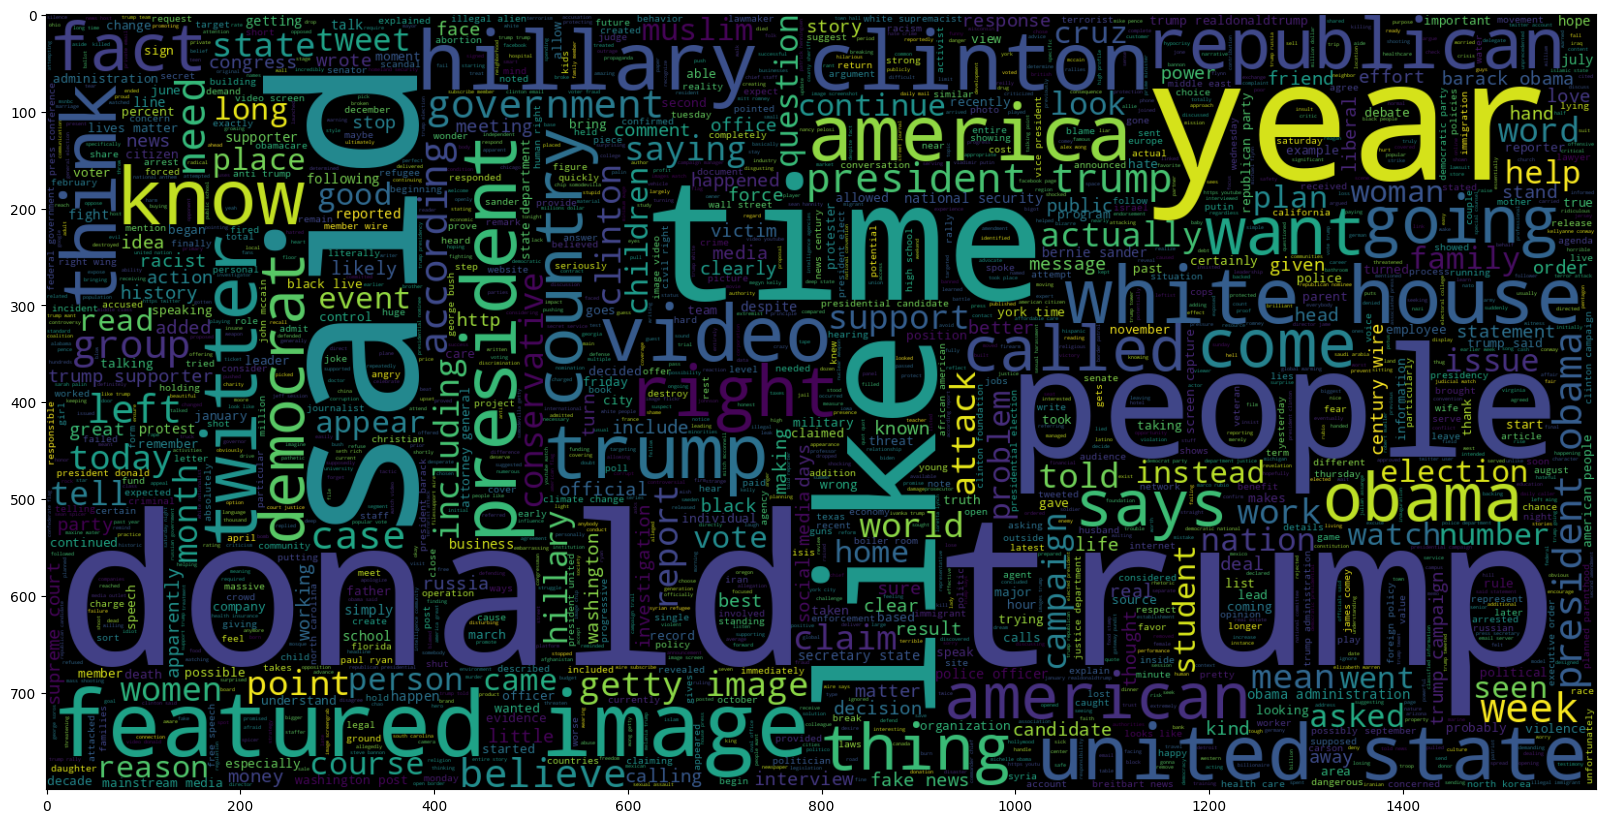

In [59]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=2000,width=1600,height=800,stopwords=stop_words).generate(" ".join(df[df.isfake==0].clean_joined))
plt.imshow(wc,interpolation='bilinear')

In [60]:
# fifnding max len

maxlen=-1
for doc in df.clean_joined:
  tokens=nltk.word_tokenize(doc)
  if(maxlen<len(tokens)):
    maxlen=len(tokens)
print("THe maximum numnber of words in any documnet is =",maxlen)

THe maximum numnber of words in any documnet is = 4405


In [61]:
# Visualizing The Distribution Of Number Of Words In A Text
import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined], nbins = 100)
fig.show()

In [64]:
# PREPAREING DATA BY TOKENIZATION AND PADDING

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.clean_joined,df.isfake,test_size=0.2)

In [66]:
from nltk import word_tokenize

tokenizer=Tokenizer(num_words=total_words)
tokenizer.fit_on_texts(x_train)
train_sequence=tokenizer.texts_to_sequences(x_train)
test_sequence=tokenizer.texts_to_sequences(x_test)

In [67]:
df.clean_joined[0]

'budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying need government raise 

In [69]:
# padding
padded_train=pad_sequences(train_sequence,maxlen=40,padding='post',truncating='post')
padded_test=pad_sequences(test_sequence,maxlen=40,truncating='post')

In [70]:
for i ,doc in enumerate(padded_train[:2]):
  print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [  393 12754   247    97  3107   185  1934  9303  4875   224  2985   152
  1422   156   224  5973  4723   813   152   158  3341     2 21904   200
  2977  3238   280  1394    67   224  5973   584  3650  3768   224  1875
 65582  3650   302    98]
The padded encoding for document 2  is :  [ 102 4222  158 3341 8234  185   23 2004 1176  144  741 1180 2049  108
   73 1046  528  467 2760  185 4222  369 7084   47 1102  185  558  158
 3341  721 9864  733  844    8  108  197   50   98 2649 4168]


In [71]:
#BUILDIng training model

model=Sequential()
model.add(Embedding(total_words,output_dim=128))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         13914112  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14,210,305
Trainable params: 14,210,305
Non-trainable params: 0
_________________________________________________________________


In [72]:
y_train=np.asarray(y_train)

In [74]:
# train model
model.fit(padded_train,y_train,batch_size=64,validation_split=0.1,epochs=2)

Epoch 1/2
506/506 [==============================] - 308s 609ms/step - loss: 9.9498e-04 - acc: 0.9997 - val_loss: 0.0063 - val_acc: 0.9989
Epoch 2/2
506/506 [==============================] - 313s 618ms/step - loss: 2.6175e-04 - acc: 0.9999 - val_loss: 0.0066 - val_acc: 0.9986


In [75]:
# Making prediction
pred = model.predict(padded_test)

281/281 [==============================] - 19s 65ms/step


In [76]:
# If The Predicted Value Is >0.95 (i.e., More Than 95%), It Is Real Else It Is Fake
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.95:
        prediction.append(1)
    else:
        prediction.append(0)

In [77]:
# Getting The Accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.9708240534521159


<Axes: >

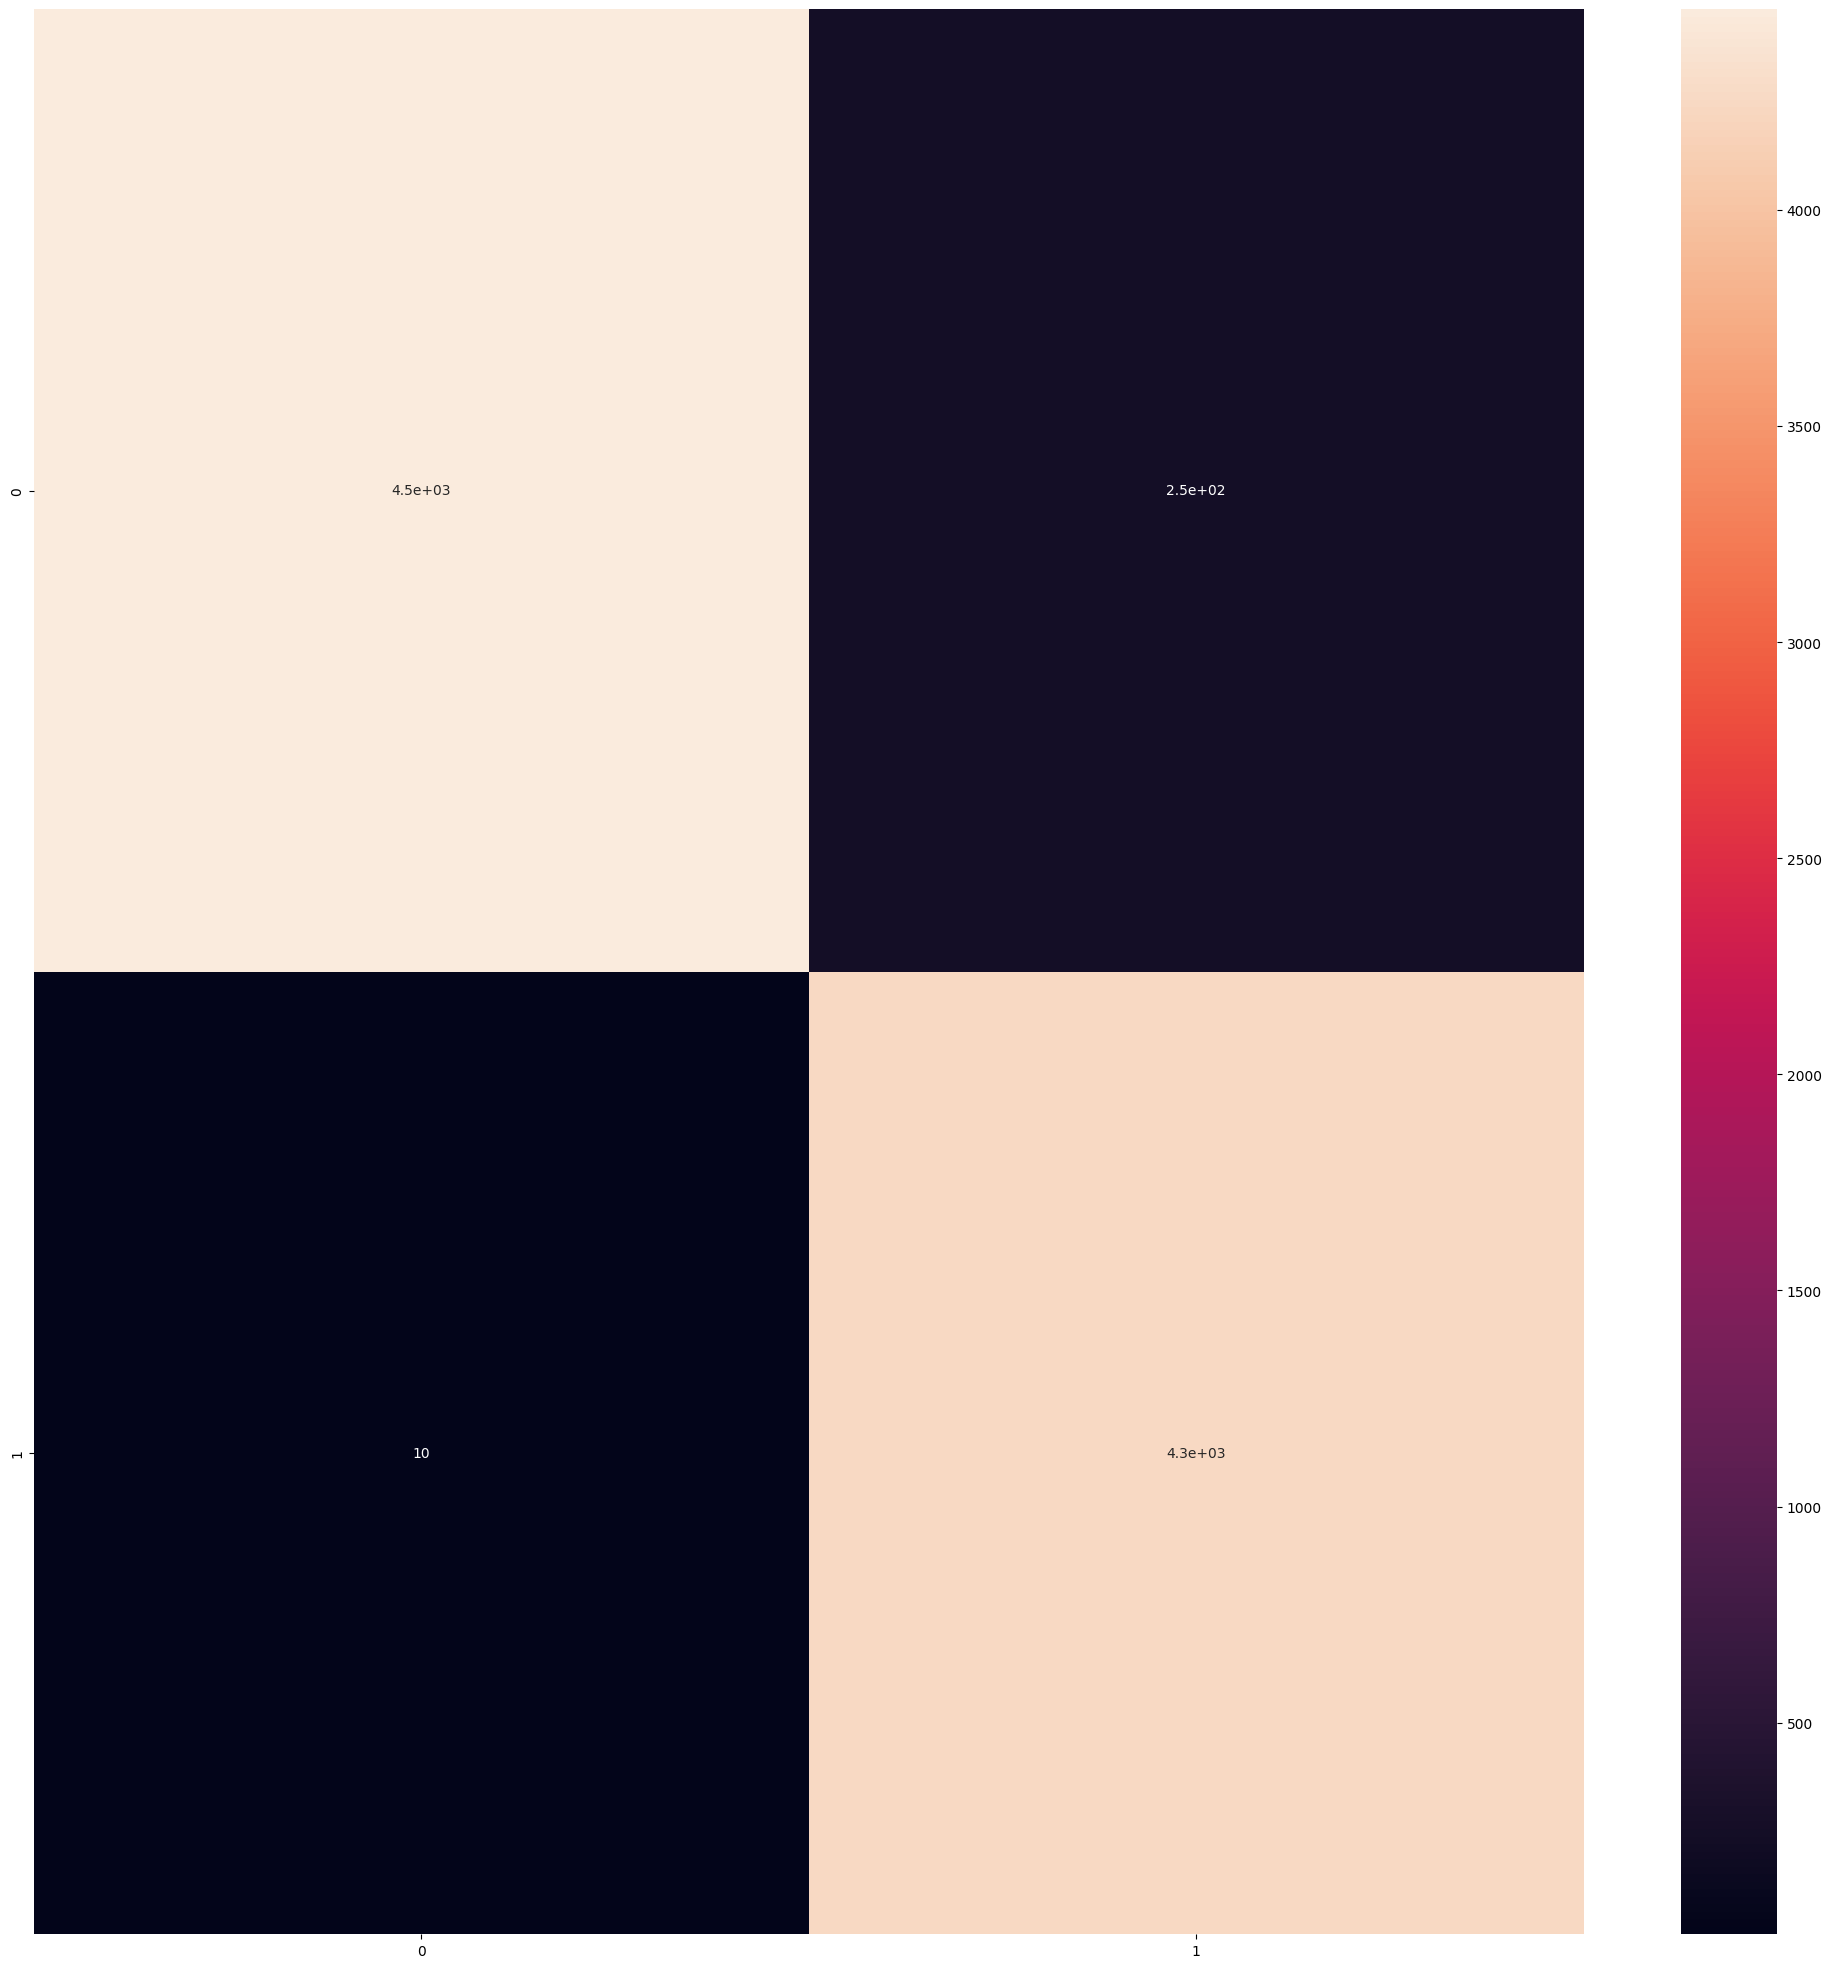

In [78]:
# Getting The Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)